In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df=pd.read_csv("breast-cancer-data.csv")
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
df.shape

(569, 32)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [8]:
df.isnull().sum().sum() # No missing values

0

In [9]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [13]:
#Convert the diagnosis column to 1/0 and store in a new column target
diagnosis_map={'B':0,
               'M':1}
df['target']=df['diagnosis'].map(diagnosis_map)

In [14]:
df['target'].value_counts()

0    357
1    212
Name: target, dtype: int64

In [21]:
#Store the encoded column in dataframe and drop the diagnosis column for simplicity.

df=df.drop(['diagnosis'],axis=1)
df.shape

(569, 32)

In [26]:
feature_cols=['id', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst']

x=df[feature_cols]
y=df['target']

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=100)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((398, 29), (171, 29), (398,), (171,))

In [32]:
import warnings
warnings.filterwarnings('ignore')

In [33]:
#Scale the data so that each feature has a single unit variance.
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_std=sc.fit_transform(x_train)
x_test_std=sc.fit_transform(x_test)

In [38]:
#Transform this data to its first 2 principal components.
from sklearn.decomposition import PCA

In [40]:
pc=PCA(n_components=2)
x_train_pc=pc.fit_transform(x_train_std)
x_test_pc=pc.fit_transform(x_test_std)

In [68]:
x_train_pc

array([[ 5.6273574 , -3.67462478, -0.13929131],
       [ 4.11653955,  4.58639809,  5.64449966],
       [-2.51039561, -1.99788121, -1.50264907],
       ...,
       [-3.85998833, -1.61531711,  0.90843757],
       [-1.92312416, -0.51578118, -0.67784882],
       [-1.80415488,  4.7942475 , -0.28575139]])

In [41]:
#Print the explained variance
pc.explained_variance_ratio_

array([0.46374767, 0.19237184])

In [75]:
target_data=np.array(df['target'])
target_data

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

Text(0, 0.5, 'Second Principal Component')

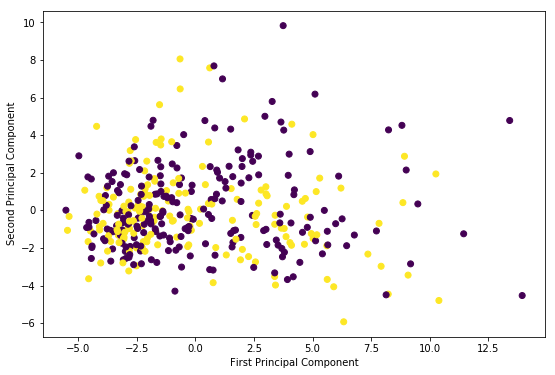

In [81]:
plt.figure(figsize=(9,6))
plt.scatter(x_train_pc[:,0],x_train_pc[:,1],c=target_data[0:398])#,cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [46]:
#Plot the two dimensions
pc_df=pd.DataFrame(data=pc.explained_variance_ratio_,columns=['PC'])
pc_df

,PC
0,0.463748
1,0.192372


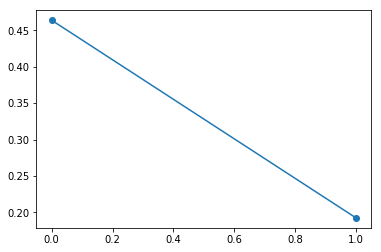

In [49]:
plt.plot(pc_df,marker='o')

In [56]:
# constructing model with 2 principal components
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [58]:
logreg=LogisticRegression()
logreg.fit(x_train_pc,y_train)
y_pred=logreg.predict(x_test_pc)
accuracy_score(y_pred,y_test)

0.9239766081871345

In [66]:
# Creating PC with 3 components
pc=PCA(n_components=3)
x_train_pc=pc.fit_transform(x_train_std)
x_test_pc=pc.fit_transform(x_test_std)
pc.explained_variance_ratio_

array([0.46374767, 0.19237184, 0.07144016])

In [67]:
logreg1=LogisticRegression()
logreg1.fit(x_train_pc,y_train)
y_pred1=logreg1.predict(x_test_pc)
accuracy_score(y_pred1,y_test)

0.9239766081871345